# K-nearest neighbors(KNN)

  
In k-NN, the algorithm uses the k closest labeled data points in the feature space to make a prediction for a new, unlabeled data point. The value of k is chosen by the user and determines how many neighbors to consider when making a prediction.  
  
For classification problems, the k-NN algorithm assigns the new data point to the class that is most common among its k nearest neighbors. For regression problems, the k-NN algorithm calculates the average (or weighted average) of the values of the k nearest neighbors to predict the value of the new data point.  

![Alt text](knn.png)    

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline 

In [69]:
penguin = pd.read_csv('/Users/weitaoran/Desktop/rice/inde577/INDE577/supervised-learning/K-Nearst/penguins_size.csv')

penguin['sex'] = penguin['sex'].map({'MALE':1,'FEMALE':0})

penguin.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0


In [70]:
penguin_new = penguin.loc[penguin["sex"] != "."]
penguin_clean=penguin_new.dropna(how='any',axis=0)
penguin_clean

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0.0


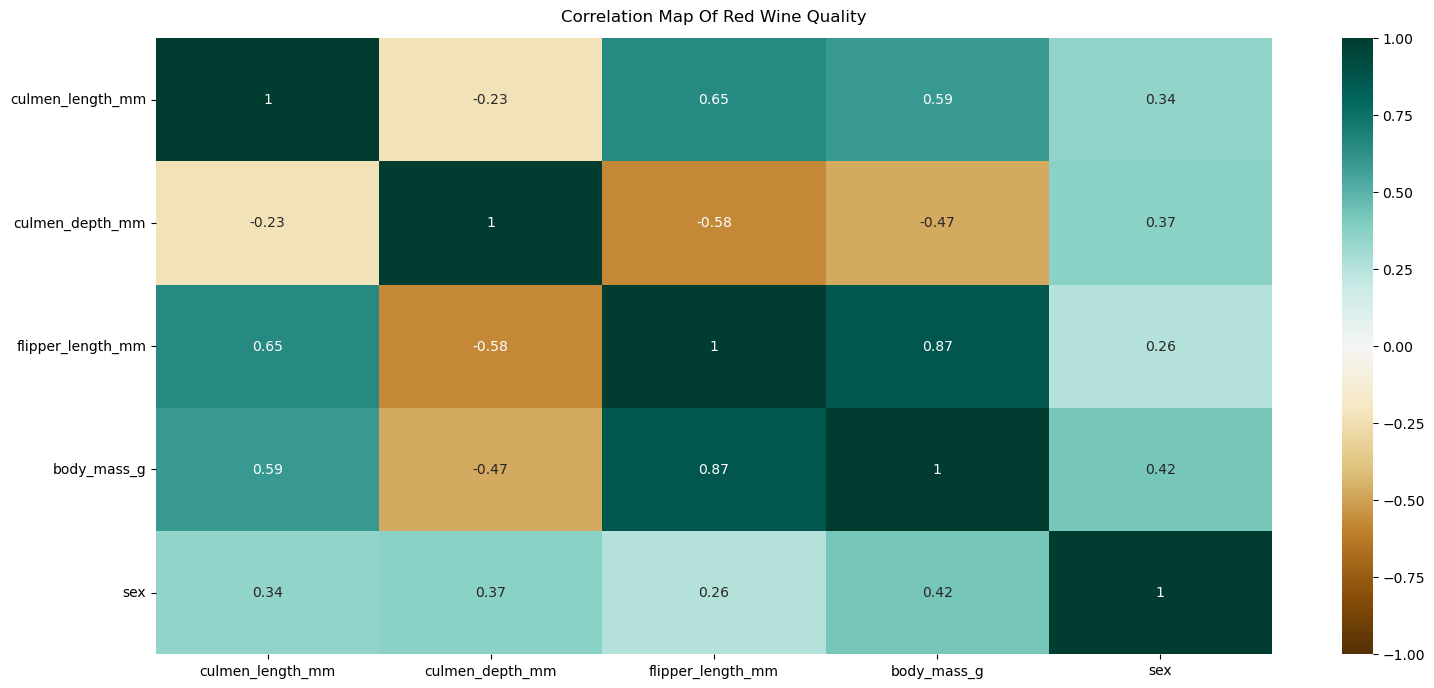

In [71]:
plt.figure(figsize=(18, 8))
sns.heatmap(penguin_clean.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation Map Of Red Wine Quality', fontdict={'fontsize':12}, pad=12);

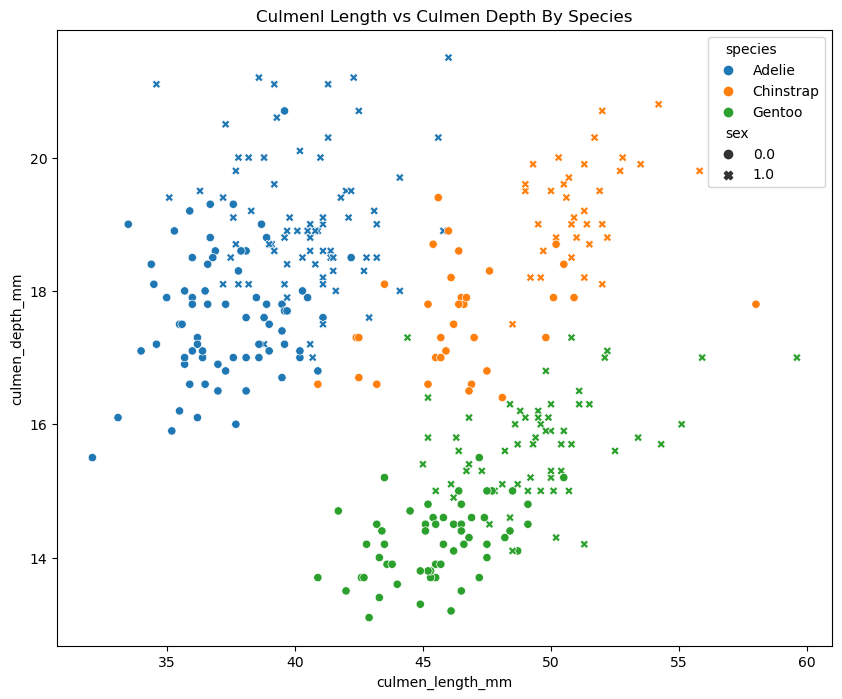

In [72]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "culmen_length_mm", y = "culmen_depth_mm", data = penguin_clean, hue = "species",style="sex")
plt.title("Culmenl Length vs Culmen Depth By Species")
plt.show() 

In [73]:
from sklearn.model_selection import train_test_split
X = penguin_clean.drop(['sex','island','species'], axis = 1).to_numpy()
y = penguin_clean['sex'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

Define the k nearest neighbors finder function and the distance function. 

In [74]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    neighbors = []
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

 Define a function KNN_predict. 

In [75]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

Define function for classifcation error rate.

In [76]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

First we try k=5.

In [92]:
K = 5
classification_error(X_test, y_test, X_train, y_train, K)

0.23880597014925373

/Users/weitaoran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/weitaoran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


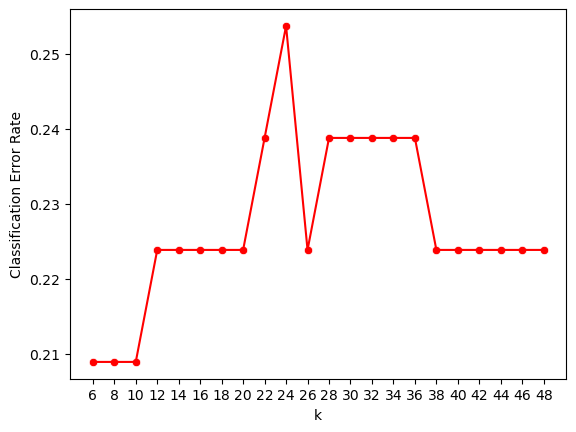

In [78]:
possible_k = [x for x in range(6, 50, 2)]
error_rate = errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]
sns.lineplot(possible_k, error_rate, color = 'red')
sns.scatterplot(possible_k, error_rate, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error Rate')
plt.xticks(possible_k)
plt.show()

The error reaches maximum at k=24 and looking at get decending as k increases. It's not descending as quick as professor shows but it's still decending in a pattern. We look at K value from range 1-15 detailly. 

/Users/weitaoran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/weitaoran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


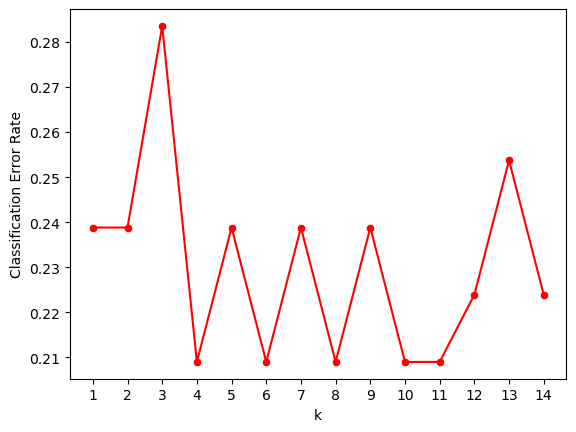

In [79]:
possible_k = [x for x in range(1, 15, 1)]
error_rate = errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]
sns.lineplot(possible_k, error_rate, color = 'red')
sns.scatterplot(possible_k, error_rate, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error Rate')
plt.xticks(possible_k)
plt.show()

The error reached maximum at k=3 and 4 and has a regular fluctuations after k=3.  The best k is k=6 similar like previous graphes. We would use k=6 which is the lowest of both graph.  

/Users/weitaoran/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/weitaoran/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

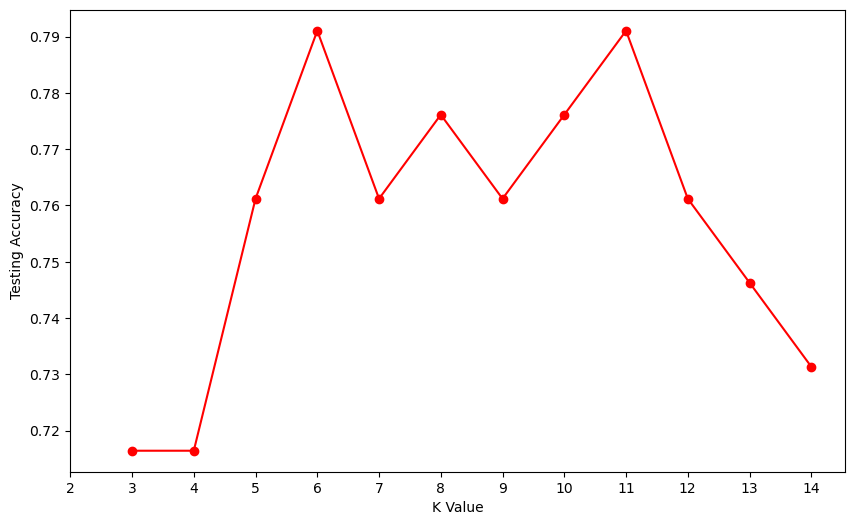

In [80]:
from sklearn.neighbors import KNeighborsClassifier
score_k =[]
for k in range (3, 15):
    knn_k =KNeighborsClassifier (n_jobs=-1, n_neighbors =k)
    knn_k.fit (X_train, y_train)
    y_pred_k = knn_k.predict (X_test)
    score = knn_k.score(X_test, y_test)
    score_k.append (score.mean ())

    #Ploting predict accuracy with different K value 
plt.figure(figsize=(10,6))
plt.plot(range(3,15), score_k,marker='o',color = 'red')
plt.xlabel ('K Value')
plt.ylabel ('Testing Accuracy')
plt.xticks (range (2,15,1))
plt.show()

In [81]:
predicted_labels = [KNN_Predict(point, X_train, 
                                y_train, 
                                6) for point in X_test]

Let's apply scale model

In [82]:
from sklearn import preprocessing
X_new = X
X_new[:,0] = preprocessing.scale(X_new[:,0])
X_new[:,1] = preprocessing.scale(X_new[:,1])

In [83]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, stratify = y, test_size = 0.2, random_state = 42)
classification_error(X_test_new, y_test_new, X_train_new, y_train_new, 6)

0.22388059701492538

/Users/weitaoran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/weitaoran/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


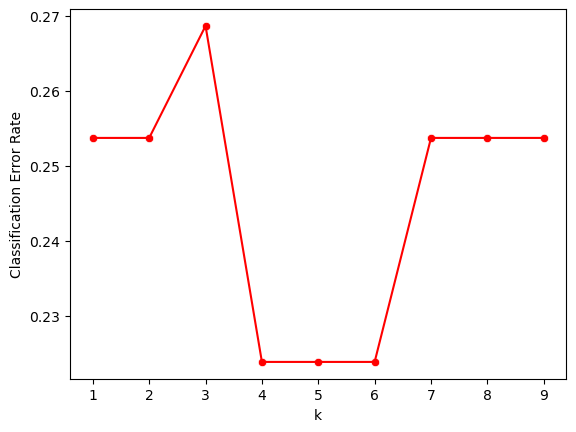

In [84]:
possible_k = [x for x in range(1, 10, 1)]
error_rate = errors = [classification_error(X_test_new, y_test_new, X_train_new, y_train_new, k) for k in possible_k]
sns.lineplot(possible_k, error_rate, color = 'red')
sns.scatterplot(possible_k, error_rate, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error Rate')
plt.xticks(possible_k)
plt.show()

In [85]:
classification_error(X_test_new, y_test_new, X_train_new, y_train_new, 6)

0.22388059701492538

In [87]:
table = [["Before scaling K = 5, the error is", classification_error(X_test, y_test, X_train, y_train, 5)], 
        ["Before scaling K = 6,the error is", classification_error(X_test_new, y_test_new, X_train_new, y_train_new, 6)],
         ["After scaling K = 6,the error is", classification_error(X_test_new, y_test_new, X_train_new, y_train_new, 6)]]
table

[['Before scaling K = 5, the error is', 0.23880597014925373],
 ['Before scaling K = 6,the error is', 0.22388059701492538],
 ['After scaling K = 6,the error is', 0.22388059701492538]]

Looks like scaling doesn't make our error lower for k=6 which is already the minimum error of all k before and after scaling